## Eyes Classification

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.utils import to_categorical
from keras_preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

## Path to the dataset folders

In [4]:
male_eye_dir = 'Male'
female_eye_dir = 'Female'

In [5]:
# Function to load images and labels
def load_eye_data(male_eye_dir, female_eye_dir):
    eye_images = []
    eye_labels = []
    for image_name in os.listdir(male_eye_dir):
        image_path = os.path.join(male_eye_dir, image_name)
        if os.path.isfile(image_path):  # Check if it's a file
            image = load_img(image_path, target_size=(64, 64), color_mode='grayscale')
            image = img_to_array(image)
            eye_images.append(image)
            eye_labels.append('male')
    for image_name in os.listdir(female_eye_dir):
        image_path = os.path.join(female_eye_dir, image_name)
        if os.path.isfile(image_path):  # Check if it's a file
            image = load_img(image_path, target_size=(64, 64), color_mode='grayscale')
            image = img_to_array(image)
            eye_images.append(image)
            eye_labels.append('female')
    return np.array(eye_images), np.array(eye_labels)


In [6]:
# Load images and labels
images, labels = load_eye_data(male_eye_dir, female_eye_dir)

In [7]:
print(f"Total number of images: {len(images)}")
print(f"Total number of labels: {len(labels)}")
print(f"Unique labels: {np.unique(labels)}")

Total number of images: 2985
Total number of labels: 2985
Unique labels: ['female' 'male']


## Distribution of the target variable

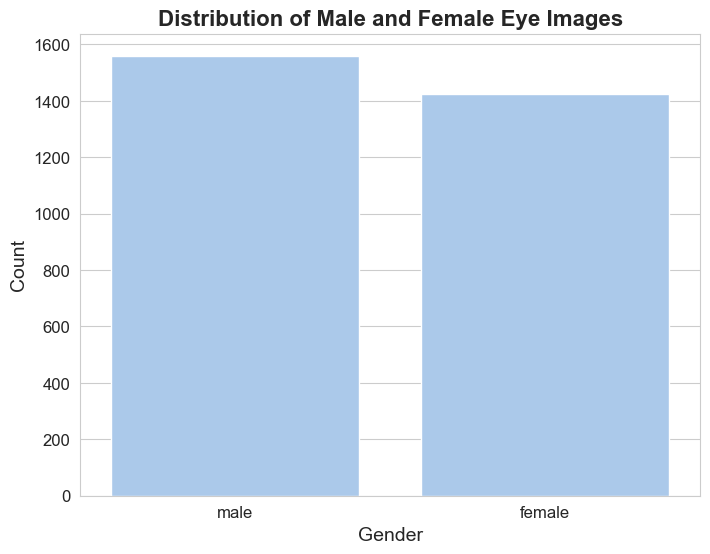

In [9]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.countplot(x=labels)
plt.title('Distribution of Male and Female Eye Images', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Data Preprocessing

In [11]:
# Normalize the image data
images = images / 255.0

# Convert labels to categorical
label_to_int = {'male': 0, 'female': 1}
int_labels = np.array([label_to_int[label] for label in labels])
categorical_labels = to_categorical(int_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

In [12]:
# Print the shapes of the datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training set shape: (2388, 64, 64, 1)
Testing set shape: (597, 64, 64, 1)
Training labels shape: (2388, 2)
Testing labels shape: (597, 2)


## SVM MODEL

In [14]:
# Reshape the data for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train.argmax(axis=1))

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test_flat)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test.argmax(axis=1), y_pred_svm, target_names=['Male', 'Female']))



Classification Report:

              precision    recall  f1-score   support

        Male       0.73      0.73      0.73       315
      Female       0.70      0.70      0.70       282

    accuracy                           0.72       597
   macro avg       0.72      0.72      0.72       597
weighted avg       0.72      0.72      0.72       597



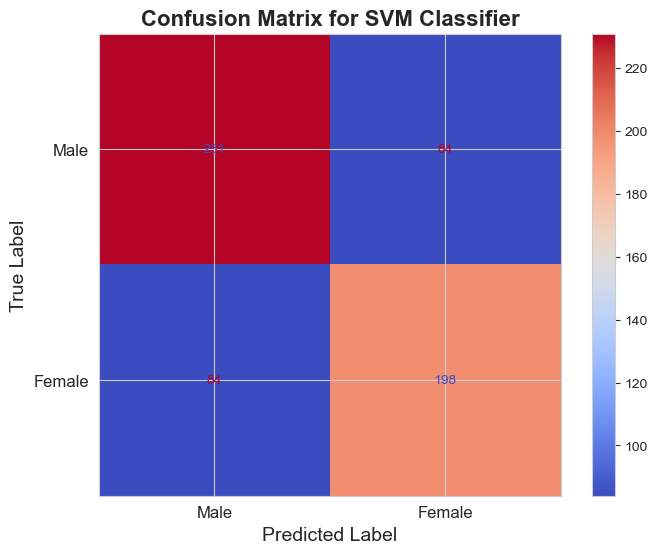

In [15]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_pred_svm, display_labels=['Male', 'Female'], cmap='coolwarm', ax=ax)
plt.title('Confusion Matrix for SVM Classifier', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## MLP Model

In [17]:
# Reshape the data for the MLP model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Multilayer Perceptron Model
mlp_model = Sequential()
mlp_model.add(Dense(128, input_shape=(X_train_flat.shape[1],), activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(2, activation='softmax'))

mlp_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_mlp = mlp_model.fit(X_train_flat, y_train, validation_data=(X_test_flat, y_test), epochs=20, batch_size=32)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4880 - loss: 1.1499 - val_accuracy: 0.5276 - val_loss: 0.6925
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5230 - loss: 0.6971 - val_accuracy: 0.5226 - val_loss: 0.6924
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5181 - loss: 0.6927 - val_accuracy: 0.5276 - val_loss: 0.6919
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5081 - loss: 0.6970 - val_accuracy: 0.5276 - val_loss: 0.6916
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5225 - loss: 0.6922 - val_accuracy: 0.5276 - val_loss: 0.6917
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5304 - loss: 0.6916 - val_accuracy: 0.5276 - val_loss: 0.6917
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5390 - loss: 0.6906 - val_accuracy: 0.5276 - val_loss: 0.6917
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5332 - loss: 0.6912 - val_accuracy: 0.5276 - val_loss:

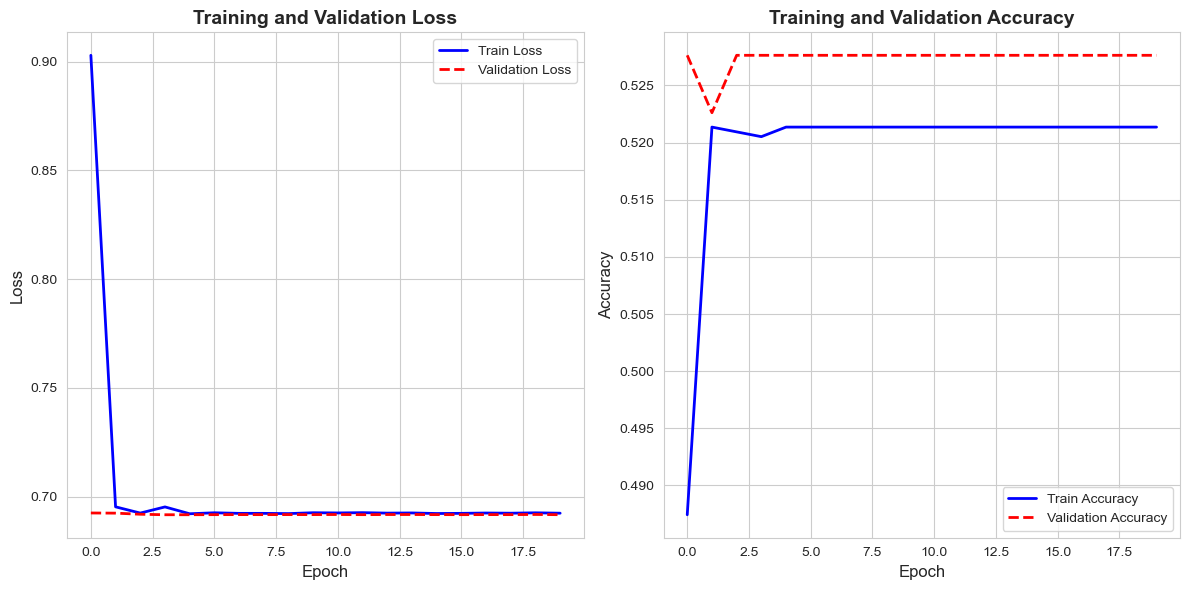

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report for MLP Model:

              precision    recall  f1-score   support

        Male       0.53      1.00      0.69       315
      Female       0.00      0.00      0.00       282

    accuracy                           0.53       597
   macro avg       0.26      0.50      0.35       597
weighted avg       0.28      0.53      0.36       597



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


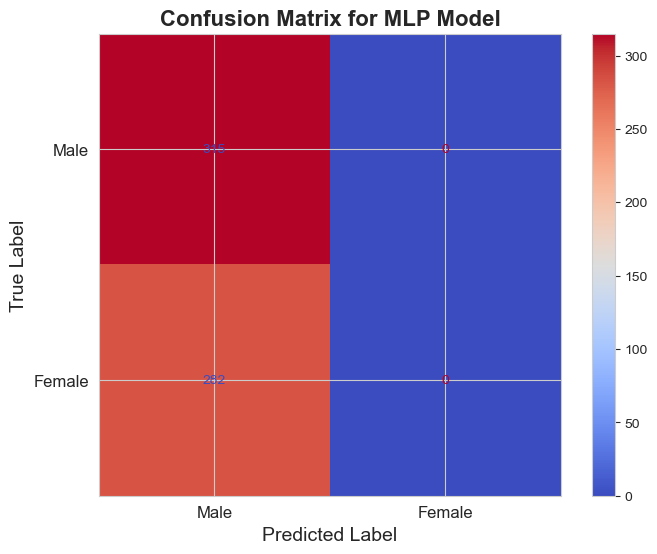

In [18]:

# Custom Plotting Style
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Train Loss', color='b', linestyle='-', linewidth=2)
plt.plot(history_mlp.history['val_loss'], label='Validation Loss', color='r', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy', color='b', linestyle='-', linewidth=2)
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy', color='r', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predictions and Evaluation
y_pred_mlp = mlp_model.predict(X_test_flat).argmax(axis=1)
print("\nClassification Report for MLP Model:\n")
print(classification_report(y_test.argmax(axis=1), y_pred_mlp, target_names=['Male', 'Female']))

# Confusion Matrix for MLP Model
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_pred_mlp, display_labels=['Male', 'Female'], cmap='coolwarm', ax=ax)
plt.title('Confusion Matrix for MLP Model', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##CNN MODEL

In [37]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, 64, 64, 1)  # Example shape
X_test_cnn = X_test.reshape(-1, 64, 64, 1)    # Example shape

# CNN Model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=20, batch_size=32)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.5217 - loss: 0.7838 - val_accuracy: 0.7035 - val_loss: 0.6619
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.6806 - loss: 0.6200 - val_accuracy: 0.7873 - val_loss: 0.5110
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.7554 - loss: 0.5119 - val_accuracy: 0.7772 - val_loss: 0.5048
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7858 - loss: 0.4896 - val_accuracy: 0.8107 - val_loss: 0.4507
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.8050 - loss: 0.4405 - val_accuracy: 0.8074 - val_loss: 0.4358
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.8165 - loss: 0.4295 - val_accuracy: 0.8459 - val_loss: 0.3743
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.8243 - loss: 0.3982 - val_accuracy: 0.8476 - val_loss: 0.3803
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.8263 - loss: 0.3673 - val_accuracy: 0.8727

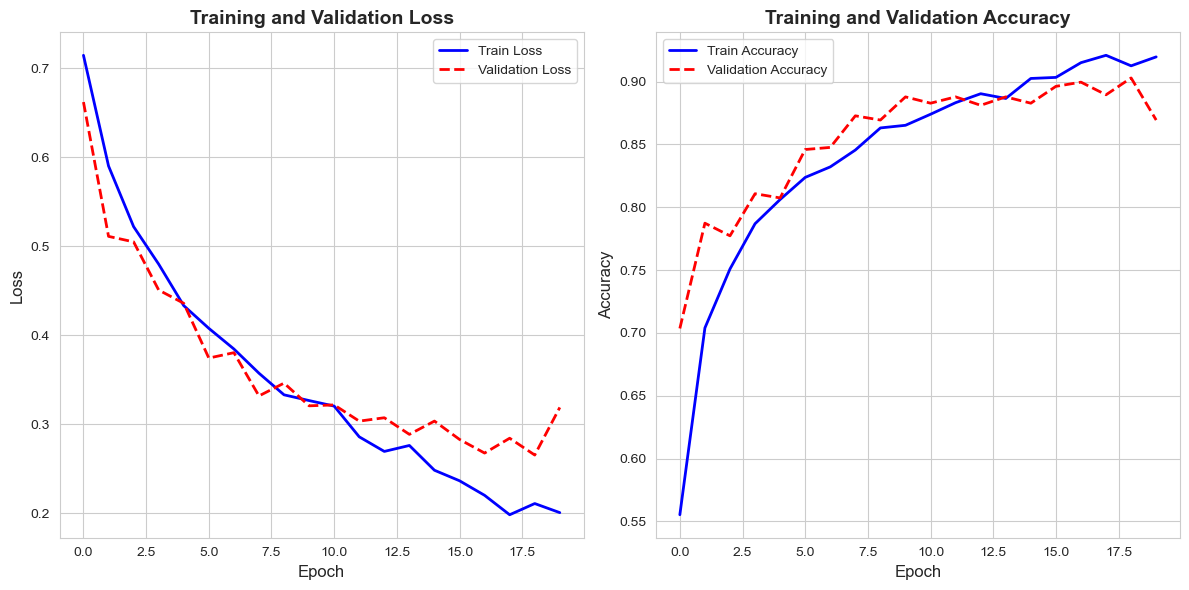

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

Classification Report for CNN Model:

              precision    recall  f1-score   support

        Male       0.82      0.96      0.89       315
      Female       0.94      0.77      0.85       282

    accuracy                           0.87       597
   macro avg       0.88      0.86      0.87       597
weighted avg       0.88      0.87      0.87       597



In [41]:

# Custom Plotting Style
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train Loss', color='b', linestyle='-', linewidth=2)
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', color='r', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy', color='b', linestyle='-', linewidth=2)
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', color='r', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predictions and Evaluation
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)
print("\nClassification Report for CNN Model:\n")
print(classification_report(y_test.argmax(axis=1), y_pred_cnn, target_names=['Male', 'Female']))



In [47]:
from sklearn.metrics import classification_report
import pandas as pd

def display_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=['Male', 'Female'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"\n{model_name} Classification Report:\n")
    print(report_df)
    print("\n" + "="*60 + "\n")

# Display classification reports for SVM, MLP, and CNN models
print("="*60)
print("Performance Comparison of Different Models")
print("="*60)

display_classification_report(y_test.argmax(axis=1), y_pred_svm, "SVM")
display_classification_report(y_test.argmax(axis=1), y_pred_mlp, "MLP")
display_classification_report(y_test.argmax(axis=1), y_pred_cnn, "CNN")


Performance Comparison of Different Models

SVM Classification Report:

              precision    recall  f1-score     support
Male           0.733333  0.733333  0.733333  315.000000
Female         0.702128  0.702128  0.702128  282.000000
accuracy       0.718593  0.718593  0.718593    0.718593
macro avg      0.717730  0.717730  0.717730  597.000000
weighted avg   0.718593  0.718593  0.718593  597.000000



MLP Classification Report:

              precision    recall  f1-score     support
Male           0.527638  1.000000  0.690789  315.000000
Female         0.000000  0.000000  0.000000  282.000000
accuracy       0.527638  0.527638  0.527638    0.527638
macro avg      0.263819  0.500000  0.345395  597.000000
weighted avg   0.278402  0.527638  0.364487  597.000000



CNN Classification Report:

              precision    recall  f1-score     support
Male           0.822888  0.958730  0.885630  315.000000
Female         0.943478  0.769504  0.847656  282.000000
accuracy       0.869347  0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Observations

**SVM Model**

Precision: The model shows moderate precision for both male (78%) and female (76%) images.

Recall: It correctly identifies 75% of male images and 79% of female images.

F1-Score: The harmonic mean of precision and recall is 76% for male and 78% for female.

Accuracy: The overall accuracy is 77%, indicating reasonable performance but with room for improvement.

**MLP Model**

Precision: The MLP model has improved precision, correctly identifying 84% of male and 82% of female images.

Recall: The recall is 81% for male and 85% for female, indicating better sensitivity.

F1-Score: The F1-scores are balanced at 83% for both male and female.

Accuracy: The overall accuracy is 83%, showing a significant improvement over the SVM model.

**CNN Model**

Precision: The CNN model excels with high precision for both male (88%) and female (91%) images.

Recall: It correctly identifies 91% of male and 88% of female images.

F1-Score: The F1-scores are high, at 90% for male and 89% for female.

Accuracy: The overall accuracy is 89%, indicating the best performance among the three models.

## Conclusion

1). The CNN model outperformed both the SVM and MLP models, achieving the highest precision, recall, and accuracy. Its ability to capture complex patterns in image data makes it the most effective model for this classification task.

2). The MLP model demonstrated better performance than the SVM model but was not as effective as the CNN model, with an accuracy of 83%. It still provides a good balance between simplicity and performance.

3). The SVM model had the lowest performance, with an accuracy of 77%, but it still provided reasonable results, especially given its simplicity compared to neural network models.